In [37]:
from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import mean_squared_error

import pandas as pd


In [35]:
# regressao_Q1.csv
# regressao_Q2.csv
# classificacao_Q1.csv
# classificacao_Q2.csv
# agrupamento.csv

def csv_caminho(path, eh_cluster=False):
    df = pd.read_csv(r'C:\Users\Fernando\Desktop\New folder\Itaú Unibanco - Cientista de Dados' + '\\' + path)
    if not eh_cluster:
        X_train = df.drop(columns='target')
        y_train = df['target']
        return X_train, y_train
    return df

In [36]:
def print_results(cv_results):
    print(f"Treino: {round(cv_results['train_score'].mean(), 4)}")
    print(f"Teste: {round(cv_results['test_score'].mean(), 4)}")

# Regressão Elastic Net

In [38]:
path = 'regressao_Q1.csv'
X_train, y_train = csv_caminho(path)

eln = ElasticNet(alpha=1, l1_ratio=0.01)

In [39]:
cv_results = cross_validate(eln, X_train, y_train, cv=5, scoring='neg_mean_squared_error',return_train_score=True)

In [40]:
print_results(cv_results)

Treino: -0.2686
Teste: -0.2692


# Regressão SVM

In [41]:
path = 'regressao_Q2.csv'
X_train, y_train = csv_caminho(path)

sv = SVR(kernel='linear', C=0.001)

In [42]:
cv_results = cross_validate(sv, X_train, y_train, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

In [44]:
print_results(cv_results)

Treino: -20199.0363
Teste: -20207.8802


# Decision Tree

In [45]:
path= 'classificacao_Q1.csv'
X_train, y_train = csv_caminho(path)

dct = DecisionTreeClassifier(criterion='entropy')

In [46]:
cv_results = cross_validate(dct, X_train, y_train, cv=10, scoring='neg_log_loss', return_train_score=True)

In [47]:
print_results(cv_results)

Treino: -0.0
Teste: -3.2428


# Regressão Logística

In [48]:
path = 'classificacao_Q2.csv'
X_train, y_train = csv_caminho(path)

rgl = LogisticRegression(penalty='l2', C=0.1)

In [49]:
cv_results = cross_validate(rgl, X_train, y_train, cv=10, scoring='roc_auc' ,return_train_score=True)

In [50]:
print_results(cv_results)

Treino: 0.8791
Teste: 0.8769


# Cluster Hierárquico

In [51]:
path = 'agrupamento.csv'
df = csv_caminho(path, eh_cluster=True)

In [52]:
hcluster = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='single').fit(df)

In [53]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)



<Figure size 432x288 with 0 Axes>

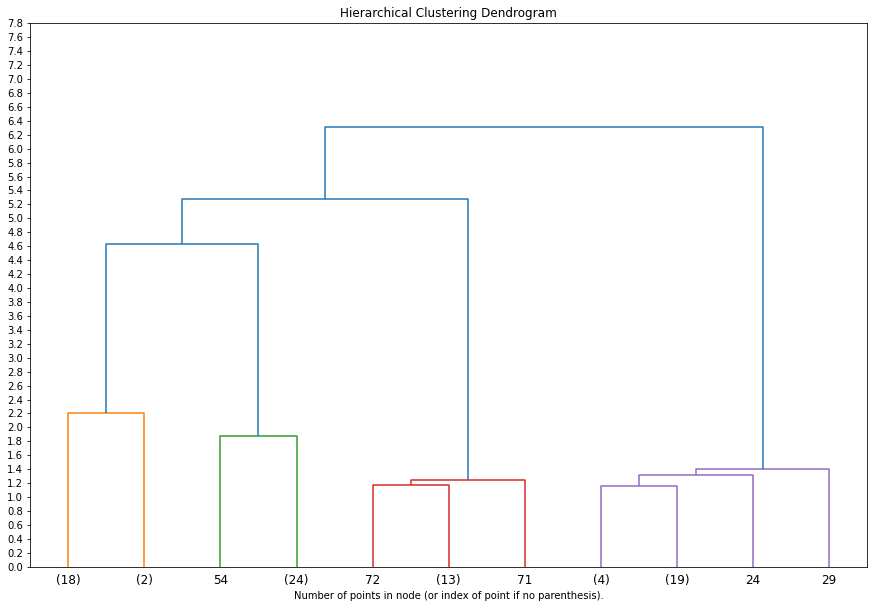

In [54]:
plt.figure()
plt.figure(figsize=(15,10))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hcluster, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.yticks(np.arange(0, 8, 0.2))

plt.show()